## **Introduction to Machine Learning & Scikit-learn**

**Scikit-learn** is the gold standard for general-purpose machine learning in Python. It's renowned for its clean, consistent API, excellent documentation, and vast collection of algorithms and tools.

# 📘 1. Core Concepts and a High-Level Overview

---

## 🧠 A. Types of Machine Learning

### 1. **Supervised Learning**
The most common type. The algorithm learns from data that is **labeled**.  
The goal is to learn a mapping function that can predict the output (label) for new, unlabeled data.

#### 🔹 Classification
- Output is a **category**.
- **Examples**:
  - "Survived" vs. "Not Survived"
  - "Spam" vs. "Not Spam"
  - "Cat" vs. "Dog"

#### 🔹 Regression
- Output is a **continuous value**.
- **Examples**:
  - Predicting the price of a house
  - Temperature
  - Stock value

---

### 2. **Unsupervised Learning**
The algorithm learns from data that is **unlabeled**.  
The goal is to find **hidden patterns** or **intrinsic structures** in the data.

#### 🔹 Clustering
- Grouping similar data points together  
- **Example**: Customer segmentation

#### 🔹 Dimensionality Reduction
- Reducing the number of variables while preserving important information

---

### 3. **Reinforcement Learning**
An agent learns to make a sequence of decisions in an environment to **maximize a cumulative reward**.  
- **Example**: Training a bot to play a game  
- *(Note: Not covered in detail here)*

---

## 🛠️ B. The Machine Learning Workflow

A high-level roadmap for nearly every **supervised learning** project:

1. ### **Problem Definition**
   - What question are you trying to answer?
   - What will you predict?

2. ### **Data Acquisition**
   - Collect the relevant dataset

3. ### **Data Preparation & Feature Engineering**
   - Clean the data
   - Handle missing values
   - Create/select input features (**X**)

4. ### **Splitting Data**
   - Split into:
     - **Training set**: For the model to learn from
     - **Testing set**: For evaluating performance on unseen data
   - 🔴 *This is CRITICAL to avoid overfitting.*

5. ### **Model Selection**
   - Choose an appropriate algorithm  
     *(e.g., Linear Regression, Logistic Regression, Decision Tree, etc.)*

6. ### **Model Training**
   - Fit the model to the training data  
   - This is the actual "learning" step

7. ### **Model Evaluation**
   - Test how well the model performs on **unseen data** (the testing set)

8. ### **Hyperparameter Tuning & Optimization**
   - Fine-tune the model’s settings to improve performance

9. ### **Prediction**
   - Use the final, trained model to make predictions on **new data**


# ⚙️ 2. Scikit-learn Fundamentals: The API

---

Scikit-learn's API is **beautifully consistent** and user-friendly. It follows a standardized flow across nearly all machine learning models.

---

## 📊 The Data

Before using any model, your data should be in **numeric format**, such as:
- `NumPy` arrays
- `Pandas` DataFrames

### 🔹 Input: `X`
- Represents the **features** (input variables)
- Typically a **2D array or DataFrame**
- **Shape**: `(n_samples, n_features)`

### 🔹 Output: `y`
- Represents the **target variable** (output/label)
- Typically a **1D array or Series**
- **Shape**: `(n_samples,)`

---

## 🧱 The Estimator Object

In Scikit-learn, **every machine learning model is an object**, often called an **Estimator**.

### 💡 Step-by-Step Process

1. **Choose a model and import its class**
   Example:
   ```python
   from sklearn.linear_model import LinearRegression
2. **Instantiate the model with desired settings (hyperparameters):** model = LinearRegression().
3. **Fit the model to the training data:** model.fit(X_train, y_train).
4. **Predict on new data:** predictions = model.predict(X_test).
5. **Evaluate the model's performance:** score = model.score(X_test, y_test).


# 3. A First Complete Example: Predicting Housing Prices (Regression)
Let's walk through the full workflow with a simple regression task.

--- Features (X) Head ---


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33



--- Target (y) Head ---


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB

Training set shape: (404, 13)
Testing set shape: (102, 13)

Model has been trained.

Mean Squared Error on Test Set: 24.29
R-squared Score on Test Set: 0.67


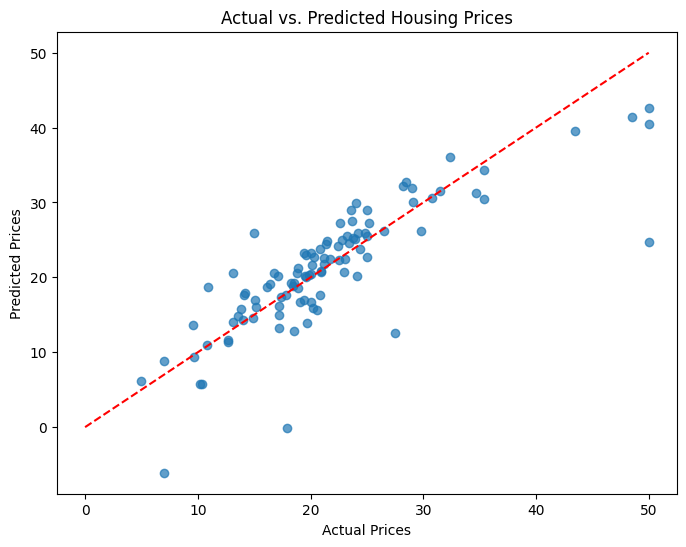

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split   # to split our data into train/test
from sklearn.linear_model import LinearRegression      # the machine learning model
from sklearn.metrics import mean_squared_error         # to check how wrong our predictions are

# 1. & 2. Problem Definition & Data Acquisition
# We'll use a built-in dataset for simplicity. Goal: Predict house prices.
# Scikit-learn removed the boston dataset, so we'll load one from a public URL.
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)

# sep=r"\s+": columns are separated by spaces
# skiprows=22: we skip first 22 lines (they're just text, not data)
# header=None: no column names in the file

data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X = pd.DataFrame(data, columns=feature_names) # Features
y = pd.Series(target, name="PRICE") # Target

# X: A table of features (input variables)
# y: A column of prices (what we want to predict)

# 3. Data Preparation (for this simple case, we'll just look at it)
print("--- Features (X) Head ---")
display(X.head())
print("\n--- Target (y) Head ---")
display(y.head())
X.info()

# 4. Splitting Data
# We split the data into 80% for training and 20% for testing.
# random_state ensures that the split is the same every time we run the code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# random_state=42: makes the split reproducible (same every time)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# 5. Model Selection
# We'll use a simple Linear Regression model.
model = LinearRegression()

# 6. Model Training
model.fit(X_train, y_train)
print("\nModel has been trained.")

# 7. Prediction & Evaluation
# Make predictions on the test set (data the model has never seen)
y_pred = model.predict(X_test)

# How good were the predictions? We'll use Mean Squared Error (MSE).
# Lower is better.
# MSE measures how wrong your predictions are, on average.
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error on Test Set: {mse:.2f}")
# The R-squared score is another common metric.
r2_score = model.score(X_test, y_test)
print(f"R-squared Score on Test Set: {r2_score:.2f}")

# Let's visualize the predictions vs. the actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Housing Prices")
# Add a line for perfect predictions
plt.plot([0, 50], [0, 50], '--', color='red')
plt.show()

### 4. Overfitting, Underfitting, and the Bias-Variance Trade-off

This is a critical conceptual topic.

---

#### 🔹 Bias
- Bias is the error due to **erroneous assumptions** in the learning algorithm.
- **High bias** can cause a model to **miss relevant relationships** between features and the target output — known as **underfitting**.
- Example: A simple model (like linear regression on a complex, non-linear dataset) has **high bias**.

---

#### 🔹 Variance
- Variance is the error due to a model's **sensitivity to small fluctuations** in the training data.
- **High variance** can cause the model to **overfit**, learning the noise in the training data instead of the actual patterns.
- Example: A very complex model (like a deep decision tree) has **high variance**.

---

#### 🔁 The Bias-Variance Trade-off

| Model Type        | Bias         | Variance     | Risk                  |
|------------------|--------------|--------------|------------------------|
| Simple Model      | High Bias    | Low Variance | Underfitting           |
| Complex Model     | Low Bias     | High Variance| Overfitting            |
| Ideal Model       | Low Bias     | Low Variance | ✅ Good Generalization |

---

#### 📊 Diagnosing Fit:

- **Underfitting**: Poor performance on both training and testing sets.
- **Overfitting**: Excellent performance on training set but poor performance on testing set.
- **Good Fit**: Good performance on both training and testing sets.

---

#### 🔄 Cross-Validation

- A more robust technique than a single train-test split.
- Training data is divided into **K folds** (commonly 5 or 10).
- The model is trained on **K−1 folds** and validated on the **remaining fold**.
- This process repeats **K times**, and the final score is the **average** of the validation scores.

✅ **Cross-validation** provides a **stable and reliable** estimate of model performance on unseen data.



# 🌸 Mini-Project: Basic Predictive Model — Iris Dataset 🌸

## 📊 Dataset Description:
The classic **Iris dataset** is used in this project. The goal is to **classify the species** of an iris flower based on its **sepal and petal measurements**.

---

### 🔹 1. Load Data
The Iris dataset is built into `scikit-learn` for convenience.

```python
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')


### 🔹 2. Inspect Data: 
Look at X.head(), X.info(), and y.value_counts().
### 🔹 3. Split Data:
Split X and y into training and testing sets (test_size=0.3, random_state=42).
### 🔹 4. Choose and Train a Model:
This is a classification problem. A good, simple starting model is LogisticRegression.
Import it: from sklearn.linear_model import LogisticRegression.
Instantiate and fit the model on your training data.
### 🔹 5. Make Predictions & Evaluate:
Make predictions on the X_test data.
Evaluate the model's accuracy. A simple way is to use the .score() method, which for classifiers gives the accuracy. accuracy = model.score(X_test, y_test).
Print the accuracy.
### 🔹 6. Cross-Validation:
For a more robust evaluation, use cross-validation.
Import it: `from sklearn.model_selection import cross_val_score`.
Run it: `scores = cross_val_score(model, X, y, cv=5)` (using the full dataset X and y, as cross_val_score handles its own splitting).
Print the array of scores and the mean score.
### 🔹 7. Summary:
In a Markdown cell, briefly explain the concepts of overfitting and underfitting in your own words. Explain why using a train-test split and cross-validation is essential to guard against them. This is a key "amaze factor" point.

In [3]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

In [4]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
y.value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (105, 4)
Testing set shape: (45, 4)


In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
print("\nModel has been trained.")
accuracy = model.score(X_test, y_test)
print(f"Accuracy on the test set: {accuracy:.4f}")


Model has been trained.
Accuracy on the test set: 1.0000


In [18]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print(f"Scores for each of the 5 folds: {scores}")
print(f"Mean cross-validation score: {scores.mean():.4f}")
print(f"Standard deviation of scores: {scores.std():.4f}\n")

Scores for each of the 5 folds: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean cross-validation score: 0.9733
Standard deviation of scores: 0.0249



## 📌 Summary: Overfitting, Underfitting, and Why We Validate

### 🔍 What is Overfitting?

In my own words, overfitting is like a student who memorizes the answers to a practice exam instead of learning the actual subject. This student will get a perfect score on that specific practice test, but when they see a real exam with slightly different questions, they will fail completely.

In machine learning, an overfitted model has learned the training data too well, including all its noise and random quirks. As a result, it performs exceptionally well on the data it was trained on, but it can't make accurate predictions on new, unseen data. It fails to generalize.

---

### 🧠 What is Underfitting?

Underfitting is the opposite problem. It's like a student who didn't study for the exam at all. They don't understand the concepts, so they do poorly on both the practice test and the real exam.

An underfit machine learning model is too simple to capture the underlying patterns in the data. It performs poorly on both the training data and new data because it hasn't learned the relationships between the features and the target.

---

### ✅ Why Train-Test Split and Cross-Validation are Essential

The main goal of machine learning is to build a model that makes accurate predictions on data it has never seen before. Train-test split and cross-validation are our essential tools to check if we are achieving this goal and to guard against over/underfitting.

- **Train-Test Split**: This is our first line of defense. By holding back a portion of our data (the test set), we can simulate how the model would perform in the real world. If the model's score is fantastic on the training data but terrible on the test data, it's a huge red flag for overfitting.

- **Cross-Validation**: A single train-test split might be "lucky" or "unlucky" depending on which data points end up in the test set. Cross-validation provides a much more reliable and robust estimate of our model's performance. It does this by creating multiple train-test splits and averaging the results. If the average score is high and the scores from each split are consistent (low standard deviation), we can be much more confident that our model will perform well on future data and is not overfitted.
